In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model

In [3]:
cfg = get_config()

if cfg['tgt_seq_len'] < cfg['val_seq_len']:
    raise ValueError("Tensors must have the same shape.")

print(f"MODEL TRAINING")
print(20*"-")
cfg['preload'] = None
cfg['num_epochs'] = 50
cfg["lr"] = 2*10**-4
cfg["exo_vars"] = [
            "month_sin", "month_cos", "day_sin", "day_cos", "hour_sin", "hour_cos",
            "quarter_hour_sin", "quarter_hour_cos", "measured_&_upscaled_wind",
            "most_recent_forecast_wind", "total_load",
            "most_recent_forecast_load", "measured_&_upscaled_solar",
            "most_recent_forecast_solar", 'year', 'not_working', 'holiday',
]

cfg['model_folder'] += cfg['run']
cfg['experiment_name'] = f"runs{cfg['run']}/tmodel"

model = train_model(cfg)
print(20*"-")

MODEL TRAINING
--------------------
Using device: cpu


Processing Epoch 00:   2%|▏         | 7/336 [00:02<01:50,  2.98it/s, loss=42865.781]

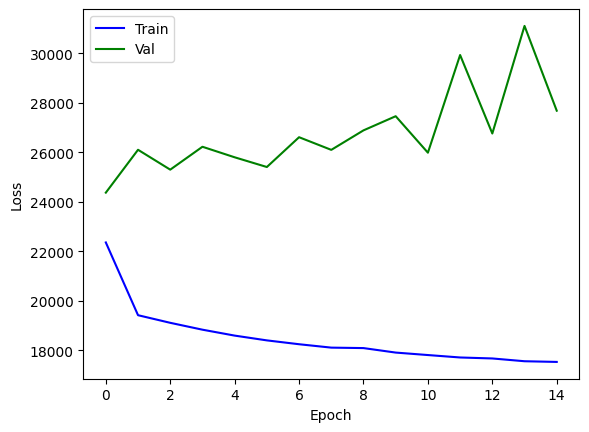

In [14]:
cfg['run'] = 2

gen_path = f'./loss/run{cfg["run"]}/'
loss_paths = [f'{gen_path}training_loss.txt', f'{gen_path}val_loss.txt']

files = {'train': None, 'val': None}
for file_path, loss_key in zip(loss_paths, files.keys()):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        float_lines = list(map(float, lines))
        files[loss_key] = float_lines

d = [i for i in range(len(files['train']))]

plt.figure()
plt.plot(d, files['train'], label="Train", color='b')
plt.plot(d, files['val'], label="Val", color='g')

# Add labels and legend
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Show the plot
plt.show()